# 타이타닉 승객 정보 데이터셋을 이용해 생존 여부 예측

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


## 데이터 확인

In [10]:
# Pclass: 티켓 클래스
# Name: 승객 이름
# Sex: 성별
# Age: 나이
# SibSp: 함께 탑승한 형제 및 배우자 수
# Parch: 함께 탑승한 부모 및 자녀의 수
# Ticket: 티켓 번호
# Embarked: 승선한 항구
# Survived: 생존 여부
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [12]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [13]:
# 상관관계
data1 = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']]
data1.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


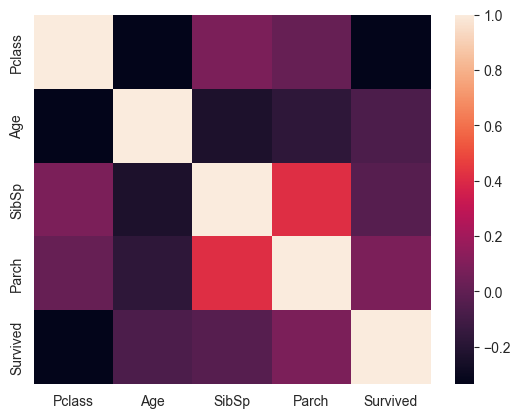

In [14]:
sns.heatmap(data1.corr()) # 상관관계에 대한 히트맵 생성
plt.show()

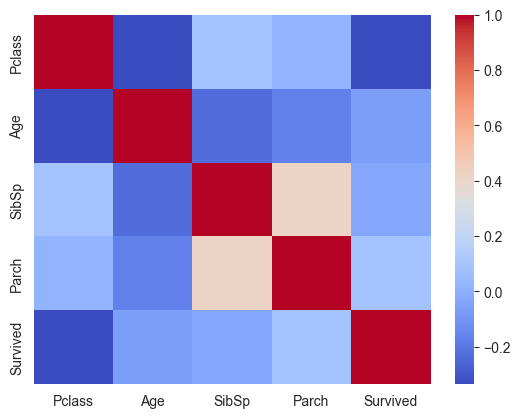

In [15]:
sns.heatmap(data1.corr(), cmap='coolwarm') # 히트맵 색상변경
plt.show()

<Axes: >

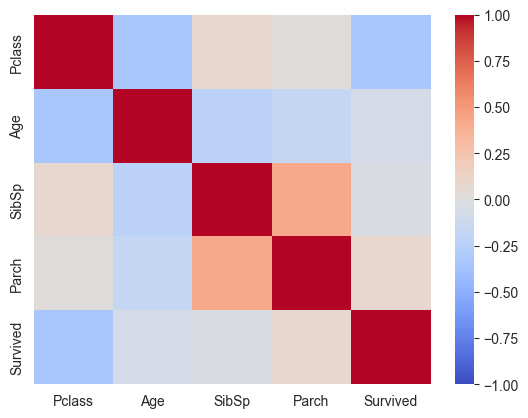

In [16]:
sns.heatmap(data1.corr(), cmap='coolwarm', vmin=-1, vmax=1) # 범위를 -1 ~ 1로 설정

<Axes: >

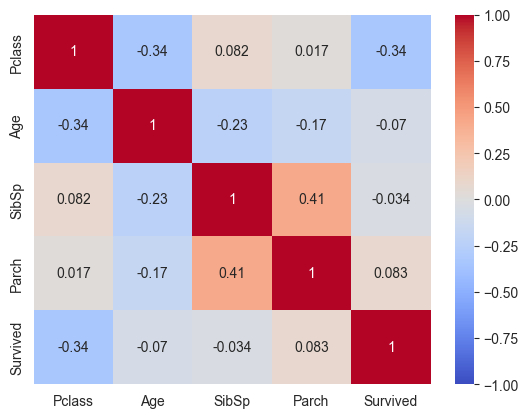

In [17]:
sns.heatmap(data1.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True) # 칸 안에 상관계수 수치 표현

## 전처리: 카테고리 변수 변환하기(더미 변수와 원-핫 인코딩)

In [18]:
data['Name'].nunique() # 고윳값 개수

889

In [19]:
data['Sex'].nunique()

2

In [20]:
data['Ticket'].nunique()

680

In [21]:
data['Embarked'].nunique()

3

In [22]:
# 의미없는 변수 제거
data = data.drop(['Name', 'Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [23]:
# 더미변수 생성
# data에 저장은 x
pd.get_dummies(data, columns = ['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [24]:
# 'drop_first=True' 이용하여 변수 최적화
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [25]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)
data

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Survived    889 non-null    int64  
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 37.5 KB


# 모델링 및 예측하기

In [27]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
pred = model.predict(X_test)
pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [30]:
accuracy_score(y_test, pred)

0.7808988764044944

In [32]:
model.coef_

array([[-1.18234544, -0.03992262, -0.32126307,  0.00792799, -2.56866822,
        -0.07874684, -0.23553206]])

In [33]:
pd.Series(model.coef_, index = X.columns)

ValueError: Length of values (1) does not match length of index (7)

In [34]:
# model.coef_ 리스트 길이 1
len(model.coef_)

1

In [35]:
# 첫 번째 값의 길이 출력
len(model.coef_[0])

7

In [36]:
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182345
Age          -0.039923
SibSp        -0.321263
Parch         0.007928
Sex_male     -2.568668
Embarked_Q   -0.078747
Embarked_S   -0.235532
dtype: float64

# 이해하기: 피처 엔지니어링

In [37]:
# SibSp 변수와 Parch 변수는 서로 상관관계가 높아 다중공선성의 문제가 발생할 수 있음
# 선형 모델의 경우 이 문제를 주의해야하기 때문에 두 변수를 합쳐 새로운 하나의 변수로 생성
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [38]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742